# Chapter 10: Clustering data into groups

In [1]:
# Clustering: Process of organizing data points into conceptually meaningful groups
# 10.1 Using centrality to discover clusters
# Modeling dart coordinates using two normal distributions
import numpy as np
np.random.seed(0)
mean = 0
variance = 2
x = np.random.normal(mean, variance ** 0.5)
y = np.random.normal(mean, variance ** 0.5)
print(f"The x coordinate of a randomly thrown dart is {x:.2f}")
print(f"The y coordinate of a randomly thrown dart is {y:.2f}")

The x coordinate of a randomly thrown dart is 2.49
The y coordinate of a randomly thrown dart is 0.57


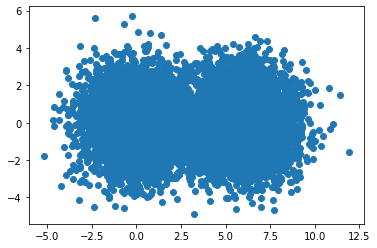

In [2]:
# Simulating 5000 darts thrown at [0,0] and 5000 thrown at [6,0]
import matplotlib.pyplot as plt
np.random.seed(1)
bulls_eye1 = [0, 0]
bulls_eye2 = [6, 0]
bulls_eyes = [bulls_eye1, bulls_eye2]
x_coordinates, y_coordinates = [], []
for bulls_eye in bulls_eyes:
    for _ in range (5000):
        x = np.random.normal(bulls_eye[0], variance ** 0.5)
        y = np.random.normal(bulls_eye[1], variance ** 0.5)
        x_coordinates.append(x)
        y_coordinates.append(y)
        
plt.scatter(x_coordinates, y_coordinates)
plt.show()

In [3]:
# Euclidean Distance: the standard straight-line distance between two points
# Assigning darts to the nearest bull's eye
from scipy.spatial.distance import euclidean
def nearest_bulls_eye(dart):
    distances = [euclidean(dart, bulls_e) for bulls_e in bulls_eyes]
    return np.argmin(distances)

darts = [[0,1], [6,1]]
for dart in darts:
    index = nearest_bulls_eye(dart)
    print(f"The dart at postition {dart} is closest to bulls-eye {index}")

The dart at postition [0, 1] is closest to bulls-eye 0
The dart at postition [6, 1] is closest to bulls-eye 1


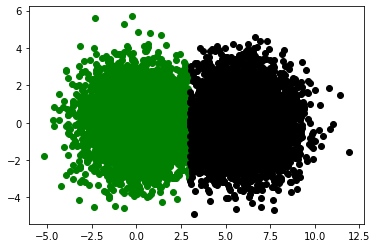

In [4]:
# Coloring darts based on the nearest bull's-eye
def color_by_cluster(darts):
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts)) if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        plt.scatter(x_coordinates, y_coordinates, color=['g', 'k'][bs_index])
    plt.show()
                    
darts = [[x_coordinates[i], y_coordinates[i]] for i in range(len(x_coordinates))]
color_by_cluster(darts)

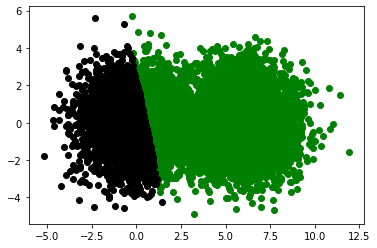

In [5]:
# Assigning darts to randomly chosen centers
bulls_eyes = np.array(darts[:2])
color_by_cluster(darts)

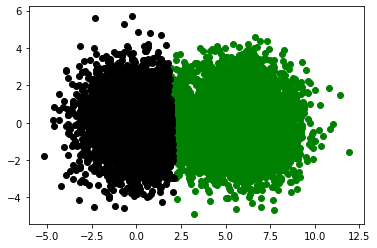

In [6]:
# Assigning darts to centers based on means
def update_bulls_eyes(darts):
    updated_bulls_eyes = []
    nearest_bulls_eyes = [nearest_bulls_eye(dart) for dart in darts]
    for bs_index in range(len(bulls_eyes)):
        selected_darts = [darts[i] for i in range(len(darts)) if bs_index == nearest_bulls_eyes[i]]
        x_coordinates, y_coordinates = np.array(selected_darts).T
        mean_center = [np.mean(x_coordinates), np.mean(y_coordinates)]
        updated_bulls_eyes.append(mean_center)
        
    return updated_bulls_eyes

bulls_eyes = update_bulls_eyes(darts)
color_by_cluster(darts)     

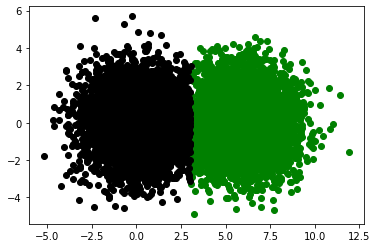

In [7]:
# Adjusting bull's-eye positions over 10 iterations
for i in range(10):
    bulls_eyes = update_bulls_eyes(darts)
    
color_by_cluster(darts)

In [8]:
# 10.2 K-means: A clustering algorithm for grouping data into K central groups
# 10.2.1 K-means clustering using scikit-learn
from sklearn.cluster import KMeans

In [9]:
# K-means clustering using scikit-learn
cluster_model = KMeans(n_clusters=2)
assigned_bulls_eyes = cluster_model.fit_predict(darts)

print("Bull's-eye assignments:")
print(assigned_bulls_eyes)

Bull's-eye assignments:
[0 0 0 ... 1 1 1]


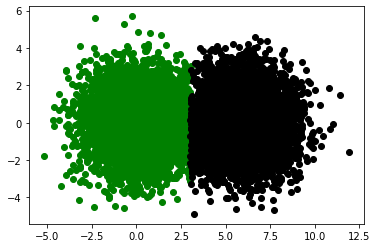

In [10]:
# Plotting K-means cluster assignments
for bs_index in range(len(bulls_eyes)):
    selected_darts = [darts[i] for i in range(len(darts)) if bs_index == assigned_bulls_eyes[i]]
    x_coordinates, y_coordinates = np.array(selected_darts).T
    plt.scatter(x_coordinates, y_coordinates, color=['g', 'k'][bs_index])
plt.show()

In [11]:
new_darts = [[500, 500], [-500, -500]]
new_bulls_eye_assignments = cluster_model.predict(new_darts)
for i, dart in enumerate(new_darts):
    bulls_eye_index = new_bulls_eye_assignments[i]
    print(f"Dart at {dart} is closest to bull's-eye {bulls_eye_index}")

Dart at [500, 500] is closest to bull's-eye 1
Dart at [-500, -500] is closest to bull's-eye 0


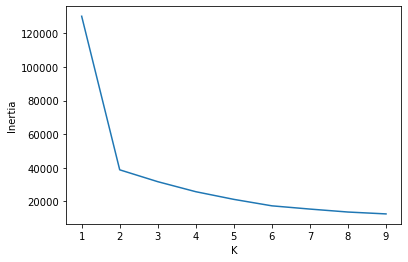

In [12]:
# 10.2.2 Selecting the optimal K using the elbow method
# Elbow Method: A method for estimating K with inertia and variance
# Plotting the K-means inertia
k_values = range(1, 10)
inertia_values = [KMeans(k).fit(darts).inertia_ for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

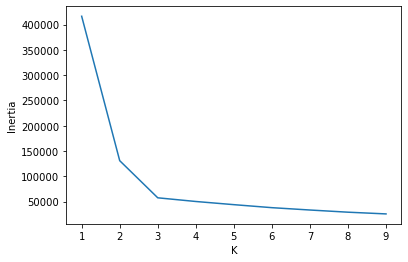

In [13]:
# Plotting inertia for a 3-dartboard simulation
new_bulls_eye = [12, 0]
for _ in range(5000):
    x = np.random.normal(new_bulls_eye[0], variance ** 0.5)
    y = np.random.normal(new_bulls_eye[1], variance ** 0.5)
    darts.append([x, y])
    
inertia_values = [KMeans(k).fit(darts).inertia_ for k in k_values]

plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

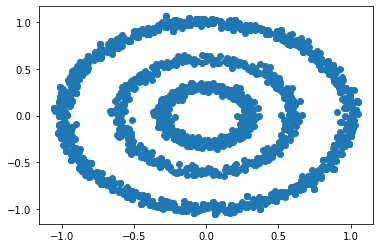

In [15]:
# 10.3 Using density to discover clusters
from sklearn.datasets import make_circles
# ^ to make the circles on a x,y coordinate grid

x_coordinates = []
y_coordinates = []
for factor in [.3, .6, .99]:
    rock_ring, _ = make_circles(n_samples=800, factor=factor, noise=0.03, random_state=1)
    
    for rock in rock_ring:
        x_coordinates.append(rock[0])
        y_coordinates.append(rock[1])

plt.scatter(x_coordinates, y_coordinates)
plt.show()

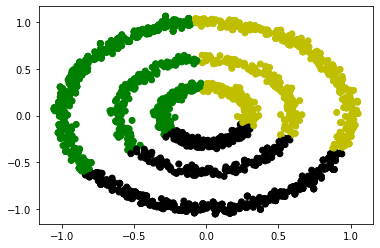

In [16]:
# Using K-means to cluster rings
rocks = [[x_coordinates[i], y_coordinates[i]] for i in range(len(x_coordinates))]
rock_clusters = KMeans(3).fit_predict(rocks)

colors = [['g', 'y', 'k'][cluster] for cluster in rock_clusters]
plt.scatter(x_coordinates, y_coordinates, color=colors)
plt.show()

In [17]:
# Density (one version): A point is in a dense region only if it's located within a distance X of Y other points
# X and Y are epsilon and min_points respectively
# Specifying density parameters
epsilon = 0.1
min_points = 10

In [18]:
# Finding the neighbors of rocks[0]
neighbor_indices = [i for i, rock in enumerate(rocks[1:]) if euclidean(rocks[0], rock) <= epsilon]

In [19]:
# Checking the density of rocks[0]
num_neighbors = len(neighbor_indices)
print(f"The rock at index 0 has {num_neighbors} neighbors.")

if num_neighbors >= min_points:
    print("It lies in a dense region")
else:
    print("It does not lie in a dense region")

The rock at index 0 has 40 neighbors.
It lies in a dense region


In [20]:
# Formal Definition of Density:
#     If a point is located within epsilon distance of min_points neighbors, then that point is in a dense region of space
#     Every neighbor of a point in a dense region of space also clusters in that space
# Creating a dense cluster
dense_region_indices = [0] + neighbor_indices
dense_region_cluster = [rocks[i] for i in dense_region_indices]
dense_cluster_size = len(dense_region_cluster)
print(f"We found a dense cluster containing {dense_cluster_size} rocks")

We found a dense cluster containing 41 rocks


In [21]:
# Expanding a dense cluster
dense_region_indices = set(dense_region_indices) # Turn to a set to avoid having to deal with duplicates
for index in neighbor_indices:
    point = rocks[index]
    neighbors_of_neighbors = [i for i, rock in enumerate(rocks) if euclidean(point, rock) <= epsilon]
    if len(neighbors_of_neighbors) >= min_points:
        dense_region_indices.update(neighbors_of_neighbors)
        
dense_region_cluster = [rocks[i] for i in dense_region_indices]
dense_cluster_size = len(dense_region_cluster)
print(f"We expanded our cluster to include {dense_cluster_size} rocks")

We expanded our cluster to include 781 rocks


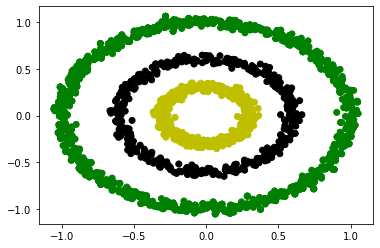

In [22]:
# 10.4 DBSCAN: A clusterin algorithm for grouping data based on spatial density
# DBSCAN: Density-Based Spatial Cluster of Applications with Noise
#    1. Select a random point coordinate from a data list
#    2. Obtain all neighbors within epsilon distance of that point
#    3. If fewer than min_points neighbors are discovered, repeat step 1 using a different random point.
#       Otherwise, group point and its neighbors into a single cluster
#    4. Iteratively repeat steps 2 and 3 across all newly discovered neighbors. All neighboring dense points are merged
#       into the cluster. Iterations terminate after the cluster stops expanding
#    5. After extracting the entire cluster, repeat steps 1-4 on all data points whose density hasn't yet been analyzed
# Using DBSCAN to cluster rings
from sklearn.cluster import DBSCAN
cluster_model = DBSCAN(eps=epsilon, min_samples=min_points)
rock_clusters = cluster_model.fit_predict(rocks)
colors = [['g', 'y', 'k'][cluster] for cluster in rock_clusters]
plt.scatter(x_coordinates, y_coordinates, color=colors)
plt.show()

In [28]:
# 10.4.1 Comparing DBSCAN and K-means
# Note: DBSCAN will need to be recomputed with new data because it could change the density of the points.
#    K-means does not have this problem because we have already selected centroids to model off of
# Finding outliers using DBSCAN
noisy_data = rocks + [[1000, -1000]]
clusters = DBSCAN(eps=epsilon, min_samples=min_points).fit_predict(noisy_data)
assert clusters[-1] == -1

In [29]:
# Note: K-means does not work for points in non-Euclidean space (not just a straight line)
# 10.4.2 Clustering based on non-Euclidean distance
# Computing the Manhattan distance
def manhattan_distance(point_a, point_b):
    num_blocks = np.sum(np.absolute(point_a - point_b))
    return 0.17 * num_blocks # 0.17 mi is the average length of a block in NY 

x = np.array([34, 5])
y = np.array([57, 8])
distance = manhattan_distance(x, y) 
# can also import cityblock from scipy.spacial.distance and then run 0.17 * cityblock(x, y)

print(f"Manhattan distance is {distance} miles")

Manhattan distance is 4.42 miles


Point at index 0 is in cluster 0
Point at index 1 is in cluster 0
Point at index 2 is in cluster 0
Point at index 3 is an outlier
Point at index 4 is an outlier


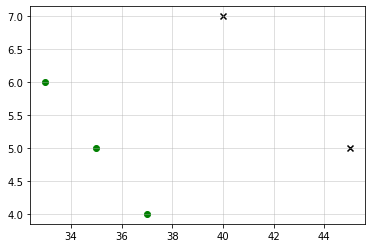

In [32]:
# Clustering using Manhattan distance
points = [[35, 5], [33, 6], [37, 4], [40, 7], [45, 5]]
clusters = DBSCAN(eps=1, min_samples=3, metric=manhattan_distance).fit_predict(points)

for i, cluster in enumerate(clusters):
    point = points[i]
    if cluster == -1:
        print(f"Point at index {i} is an outlier")
        plt.scatter(point[0], point[1], marker='x', color='k')
    else:
        print(f"Point at index {i} is in cluster {cluster}")
        plt.scatter(point[0], point[1], color='g')
        
plt.grid(True, which='both', alpha=0.5)
plt.show()

In [33]:
# Clustering using a ridiculous measure of distance
def ridiculous_measure(point_a, point_b):
    is_negative_a = np.array(point_a) < 0
    is_negative_b = np.array(point_b) < 0
    if is_negative_a.all() and is_negative_b.all(): # all elements are negative
        return 0
    elif is_negative_a.any() or is_negative_b.any(): # at least one element is negative
        return 10
    else: # no negative elements
        return 2
    
points = [[-1, -1], [-10, -10], [-1000, -13435], [3, 5], [5, -7]]
clusters = DBSCAN(eps=0.1, min_samples=2, metric=ridiculous_measure).fit_predict(points)

for i, cluster in enumerate(clusters):
    point = points[i]
    if cluster == -1:
        print(f"{point} is an outlier")
    else:
        print(f"{point} falls in cluster {cluster}")

[-1, -1] falls in cluster 0
[-10, -10] falls in cluster 0
[-1000, -13435] falls in cluster 0
[3, 5] is an outlier
[5, -7] is an outlier


In [34]:
# 10.5 Analyzing clusters using Pandas
# Storing clustered coordinates in a table
import pandas as pd
x_coordinates, y_coordinates = np.array(rocks).T
df = pd.DataFrame({'X': x_coordinates, 'Y': y_coordinates, 'Cluster': rock_clusters})

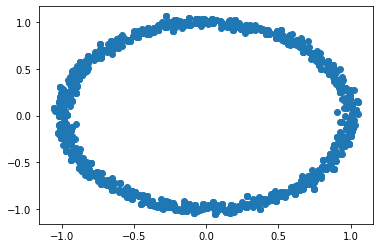

In [40]:
# Plotting a single cluster using Pandas
df_cluster = df[df.Cluster == 0]

# df_cluster.plot.scatter(x='X', y='Y')
# OR
plt.scatter(df_cluster.X, df_cluster.Y)
plt.show()

Skipping over cluster 0
Plotting cluster 1
Plotting cluster 2


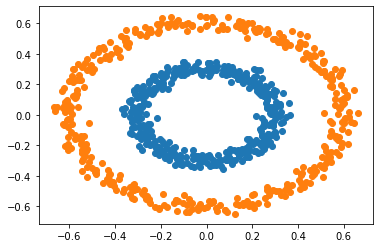

In [41]:
# Iterating over clusters using Pandas
for cluster_id, df_cluster in df.groupby('Cluster'): # each element is a tuple: (Cluster ID, all rows in ID)
    if cluster_id == 0:
        print(f"Skipping over cluster {cluster_id}")
        continue
    
    print(f"Plotting cluster {cluster_id}")
    plt.scatter(df_cluster.X, df_cluster.Y)
    
plt.show()

# Key Words / Notes:
- K-Means: Algorithm that clusters inputted data by searching for K centroids. These centroids represent the mean coordinates of the discovered data groups. K-means is initialized by selecting K random centroids. Each data point is then clustered based on its nearest centroid, and the centroids are iteratively recomputed until they converge on stable locations
- K-means is guaranteed to converge to a solution, but it may not be optimal based on the initial K random centroids
- K-means requires Euclidean distances to distinguish points because it uses means. 
- Inertia: equals the sum of the squared distances between each data point and its closest center
- Elbow Plot: Plotting inertia across a range of K values. The elbow component in the elbow-plot should point downward to a reasonable K value. We can heuristically select a meaningful K input for K-means
- DBSCAN: clusters data based on density. Density is defined with epsilon and min_points.If a point is located within epsilon distance of min_points, then that point is in a dense region of space. Every neighbor of a point in a dense region of space also clusters in that space. DBSCAN iteratively expands the boundaries of a dense region of space until a complete cluster is detected.
- Points in non-dense regions are not clustered by the DBSCAN algo. They are treated as outliers
- DBSCAN is an advantageous algorithm for clustering data composed of curving and dense shapes
- DBSCAN can cluster using arbitray, non-Euclidean distances
- There is no reliable heuristic for choosing appropriate epsilon and min_point parameters. However, if we wish to cluster global cities, we can set the two parameters to 250 miles and three cities, respectively
- Storing clustered data in a Pandas table allows us to intuitively iterate over cluters with the *groupby()* method